Takes: 
*   master_results.csv

Returns:
*   figures and analysis to be used in paper
Figures were from sections titled "AB Progression", "BC/XY Comparison", and "AC in New Format"
Analysis was over "OLS Regression"

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import math
import statistics
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [ ]:
def average(lst):
    return math.fsum(lst) / len(lst)

In [ ]:
#open master file
droplist = [10,25,33]
master_df = pd.read_csv("master_results.csv")
master_df = master_df.set_index("Participant")
master_df = master_df.drop(droplist)

Reasons for Droplist:

  10: run on wrong seeds for day 2

  25: did not improve over AB1 -> AB3 (12,35,34)

  33: did not come for day 2

### Exclusion Criterion

In [ ]:
#binomial tests of each participant
#checking for BC
for index, row in master_df.iterrows():
  p_val = stats.binom_test(row['BCallCorr'], n=row['BCTot'], p=0.333333, alternative='less')
  if p_val < 0.1:
    print(index)
    print(p_val)

37
0.0811792187052478


In [ ]:
#checking for BC neutral
for index, row in master_df.iterrows():
  p_val = stats.binom_test(row['BCneuCorr'], n=row['BCneuTot'], p=0.333333, alternative='less')
  if p_val < 0.1:
    print(index)
    print(p_val)

In [ ]:
#checking for BC fearful
for index, row in master_df.iterrows():
  p_val = stats.binom_test(row['BCfearCorr'], n=row['BCfearTot'], p=0.333333, alternative='less')

  if p_val < 0.1:
    print(index)
    print(p_val)

In [ ]:
#checking for AB3
for index, row in master_df.iterrows():
  p_val = stats.binom_test(row['AB3allCorr'], n = 48, p = 0.333333, alternative = 'less')
  if p_val < 0.1:
    print(index)
    print(p_val)

In [ ]:
#checking for XY
for index, row in master_df.iterrows():
  p_val = stats.binom_test(row['XYallCorr'], n=row['XYTot'], p=0.333333, alternative='less')

  if p_val < 0.1:
    print(index)
    print(p_val)

In [ ]:
#compare initial accuracy of AB to initial accuracy of XY
for index, row in master_df.iterrows():
  print(index)
  print(row['AB1allAcc'])
  print(row['XYallAcc'])

#ttest of significant difference between AB1 and XY
print(stats.ttest_rel(master_df['AB1allAcc'], master_df['XYallAcc']))

#could be because fatigue, surprise, familiarizing with task

1
0.7291666666666666
0.875
2
0.6875
0.5
3
0.5625
0.7083333333333334
4
0.6666666666666666
0.75
5
0.5208333333333334
0.7291666666666666
6
0.3333333333333333
0.6666666666666666
7
0.4791666666666667
0.5416666666666666
8
0.7916666666666666
0.8541666666666666
9
0.6041666666666666
0.4791666666666667
11
0.5208333333333334
0.6875
12
0.7083333333333334
0.7291666666666666
13
0.6875
0.8958333333333334
14
0.4791666666666667
0.6666666666666666
15
0.4375
0.5833333333333334
16
0.6041666666666666
0.7291666666666666
17
0.5416666666666666
0.7291666666666666
18
0.5625
0.75
19
0.3958333333333333
0.4791666666666667
20
0.6458333333333334
0.7708333333333334
21
0.6875
0.75
22
0.5416666666666666
0.6041666666666666
23
0.5208333333333334
0.3541666666666667
24
0.6458333333333334
0.75
26
0.3958333333333333
0.6666666666666666
27
0.6041666666666666
0.6875
28
0.6041666666666666
0.8125
29
0.6458333333333334
0.7291666666666666
30
0.3958333333333333
0.5416666666666666
31
0.5416666666666666
0.625
32
0.7083333333333334
0.6

###AC Accuracy

In [ ]:
#creates df of only AC and ACx accuracy Data
AC_Df = pd.DataFrame()
AC_Df['Accuracy'] = master_df['adjACneuAcc']
pt_len = len(master_df['adjACneuAcc'])
AC_Df['Valence'] = ['neu'] * pt_len
AC_Df['Day'] = ['1'] * pt_len

A_df = pd.DataFrame()
A_df['Accuracy'] = master_df['adjACfearAcc']
pt_len = len(master_df['adjACfearAcc'])
A_df['Valence'] = ['fear'] * pt_len
A_df['Day'] = ['1'] * pt_len

B_df = pd.DataFrame()
B_df['Accuracy'] = master_df['adjACxneuAcc']
pt_len = len(master_df['adjACxneuAcc'])
B_df['Valence'] = ['neu'] * pt_len
B_df['Day'] = ['2'] * pt_len

C_df = pd.DataFrame()
C_df['Accuracy'] = master_df['adjACxfearAcc']
pt_len = len(master_df['adjACxfearAcc'])
C_df['Valence'] = ['fear'] * pt_len
C_df['Day'] = ['2'] * pt_len

#concatenate all dfs into one AC_df
AC_Df = pd.concat([AC_Df,A_df])
AC_Df = pd.concat([AC_Df,B_df])
AC_Df = pd.concat([AC_Df,C_df])

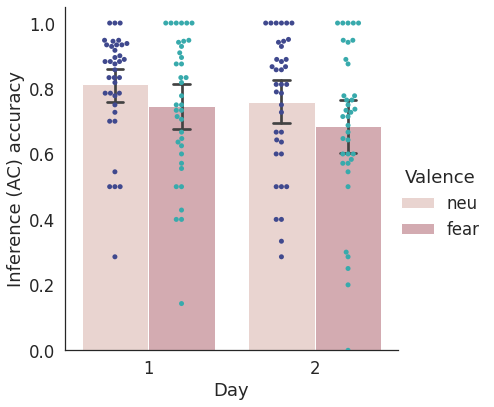

In [ ]:
#Graph of AC inference accuracy from day 1 to day 2
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(y = 'Accuracy', hue = 'Valence', x = 'Day', data = AC_Df, height=6, kind="bar", palette=sns.cubehelix_palette(), capsize=.1)
g = sns.swarmplot(y = 'Accuracy', hue = 'Valence', x = 'Day', data = AC_Df, palette = "mako", dodge=True)
plt.ylabel("Inference (AC) accuracy")
g.legend_.remove()

In [ ]:
#paired t-tests for AC Day 1 vs Day 2
print('Day1 Neutral vs. Fearful:')
print(stats.ttest_rel(master_df['adjACneuAcc'], master_df['adjACfearAcc']))
print('Day2 Neutral vs. Fearful:')
print(stats.ttest_rel(master_df['adjACxneuAcc'], master_df['adjACxfearAcc']))
print('Day1 Neutral vs Day2 Neutral:')
print(stats.ttest_rel(master_df['adjACneuAcc'], master_df['adjACxneuAcc']))
print('Day1 Fearful vs Day2 Fearful:')
print(stats.ttest_rel(master_df['adjACfearAcc'], master_df['adjACxfearAcc']))
print('Day1 Neutral vs Day2 Fearful:')
print(stats.ttest_rel(master_df['adjACneuAcc'], master_df['adjACxfearAcc']))
print('Day1 Fearful vs Day2 Neutral:')
print(stats.ttest_rel(master_df['adjACfearAcc'], master_df['adjACxneuAcc']))

Day1 Neutral vs. Fearful:
Ttest_relResult(statistic=2.482685474831988, pvalue=0.017837234327739353)
Day2 Neutral vs. Fearful:
Ttest_relResult(statistic=2.347236652370887, pvalue=0.02453115351041975)
Day1 Neutral vs Day2 Neutral:
Ttest_relResult(statistic=2.2850553497527257, pvalue=0.02830526127093055)
Day1 Fearful vs Day2 Fearful:
Ttest_relResult(statistic=1.9441593436985625, pvalue=0.05972308939912887)
Day1 Neutral vs Day2 Fearful:
Ttest_relResult(statistic=3.993907470910108, pvalue=0.0003068927103976127)
Day1 Fearful vs Day2 Neutral:
Ttest_relResult(statistic=-0.3851295378944745, pvalue=0.7024076034872249)


###BC Accuracy

In [ ]:
#creates df of only BC accuracy on day 1 and 2
BC_Df = pd.DataFrame()
BC_Df['Accuracy'] = master_df['BCneuAcc']
pt_len = len(master_df['BCneuAcc'])
BC_Df['Valence'] = ['neu'] * pt_len
BC_Df['Day'] = ['1'] * pt_len

A_df = pd.DataFrame()
A_df['Accuracy'] = master_df['BCfearAcc']
pt_len = len(master_df['BCfearAcc'])
A_df['Valence'] = ['fear'] * pt_len
A_df['Day'] = ['1'] * pt_len

B_df = pd.DataFrame()
B_df['Accuracy'] = master_df['dBCneuAcc']
pt_len = len(master_df['dBCneuAcc'])
B_df['Valence'] = ['neu'] * pt_len
B_df['Day'] = ['2'] * pt_len

C_df = pd.DataFrame()
C_df['Accuracy'] = master_df['dBCfearAcc']
pt_len = len(master_df['dBCfearAcc'])
C_df['Valence'] = ['fear'] * pt_len
C_df['Day'] = ['2'] * pt_len

#concatenate all dfs into one BC_df
BC_Df = pd.concat([BC_Df,A_df])
BC_Df = pd.concat([BC_Df,B_df])
BC_Df = pd.concat([BC_Df,C_df])

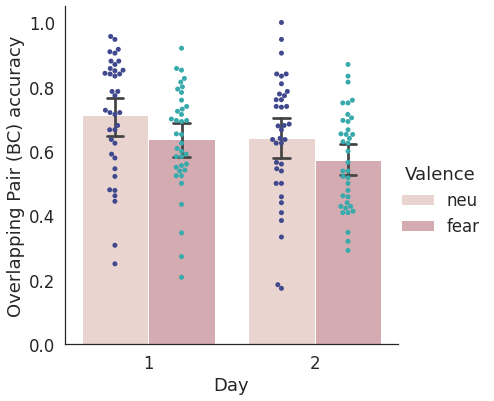

In [ ]:
#Graph of BC accuracy from day 1 to day 2
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(y = 'Accuracy', hue = 'Valence', x = 'Day', data = BC_Df, height=6, kind="bar", palette=sns.cubehelix_palette(), capsize=.1)
g = sns.swarmplot(y = 'Accuracy', hue = 'Valence', x = 'Day', data = BC_Df, palette = "mako", dodge=True)
plt.ylabel("Overlapping Pair (BC) accuracy")
g.legend_.remove()

In [ ]:
#paired t-tests for day 1 vs day 2 BC accuracy
print('Day1 Neutral vs. Fearful:')
print(stats.ttest_rel(master_df['BCneuAcc'], master_df['BCfearAcc']))
print('Day2 Neutral vs. Fearful:')
print(stats.ttest_rel(master_df['dBCneuAcc'], master_df['dBCfearAcc']))
print('Day1 Neutral vs Day2 Neutral:')
print(stats.ttest_rel(master_df['BCneuAcc'], master_df['dBCneuAcc']))
print('Day1 Fearful vs Day2 Fearful:')
print(stats.ttest_rel(master_df['BCfearAcc'], master_df['dBCfearAcc']))
print('Day1 Neutral vs Day2 Fearful:')
print(stats.ttest_rel(master_df['BCneuAcc'], master_df['dBCfearAcc']))
print('Day1 Fearful vs Day2 Neutral:')
print(stats.ttest_rel(master_df['BCfearAcc'], master_df['dBCneuAcc']))

Day1 Neutral vs. Fearful:
Ttest_relResult(statistic=2.9728011638323077, pvalue=0.0052362455939839285)
Day2 Neutral vs. Fearful:
Ttest_relResult(statistic=2.8495313604933976, pvalue=0.007198348979461106)
Day1 Neutral vs Day2 Neutral:
Ttest_relResult(statistic=3.2548169602560324, pvalue=0.002472442534876847)
Day1 Fearful vs Day2 Fearful:
Ttest_relResult(statistic=2.876478075509525, pvalue=0.006718211497915357)
Day1 Neutral vs Day2 Fearful:
Ttest_relResult(statistic=6.158062209335165, pvalue=4.2755126664400336e-07)
Day1 Fearful vs Day2 Neutral:
Ttest_relResult(statistic=-0.14702160658400507, pvalue=0.8839352565420135)


### XY Accuracy

In [ ]:
#creates df of only XY accuracy on day 1 and day 2
XY_Df = pd.DataFrame()
XY_Df['Accuracy'] = master_df['XYneuAcc']
pt_len = len(master_df['XYneuAcc'])
XY_Df['Valence'] = ['neu'] * pt_len
XY_Df['Day'] = ['1'] * pt_len

A_df = pd.DataFrame()
A_df['Accuracy'] = master_df['XYfearAcc']
pt_len = len(master_df['XYfearAcc'])
A_df['Valence'] = ['fear'] * pt_len
A_df['Day'] = ['1'] * pt_len

B_df = pd.DataFrame()
B_df['Accuracy'] = master_df['dXYneuAcc']
pt_len = len(master_df['dXYneuAcc'])
B_df['Valence'] = ['neu'] * pt_len
B_df['Day'] = ['2'] * pt_len

C_df = pd.DataFrame()
C_df['Accuracy'] = master_df['dXYfearAcc']
pt_len = len(master_df['dXYfearAcc'])
C_df['Valence'] = ['fear'] * pt_len
C_df['Day'] = ['2'] * pt_len

#concatenate all dfs into one df
XY_Df = pd.concat([XY_Df,A_df])
XY_Df = pd.concat([XY_Df,B_df])
XY_Df = pd.concat([XY_Df,C_df])

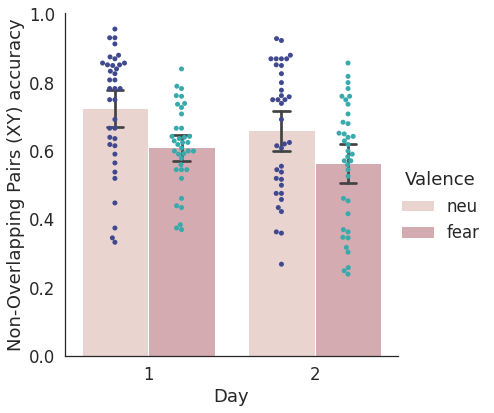

In [ ]:
#Graph of XY accuracy from day 1 to day 2
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(y = 'Accuracy', hue = 'Valence', x = 'Day', data = XY_Df, height=6, kind="bar", palette=sns.cubehelix_palette(), capsize=.1)
g = sns.swarmplot(y = 'Accuracy', hue = 'Valence', x = 'Day', data = XY_Df, palette = "mako", dodge=True)
plt.ylabel("Non-Overlapping Pairs (XY) accuracy")
g.legend_.remove()

In [ ]:
#paired t-tests for day 1 vs day 2 XY accuracy
print('Day1 Neutral vs. Fearful:')
print(stats.ttest_rel(master_df['XYneuAcc'], master_df['XYfearAcc']))
print('Day2 Neutral vs. Fearful:')
print(stats.ttest_rel(master_df['dXYneuAcc'], master_df['dXYfearAcc']))
print('Day1 Neutral vs Day2 Neutral:')
print(stats.ttest_rel(master_df['XYneuAcc'], master_df['dXYneuAcc']))
print('Day1 Fearful vs Day2 Fearful:')
print(stats.ttest_rel(master_df['XYfearAcc'], master_df['dXYfearAcc']))
print('Day1 Neutral vs Day2 Fearful:')
print(stats.ttest_rel(master_df['XYneuAcc'], master_df['dXYfearAcc']))
print('Day1 Fearful vs Day2 Neutral:')
print(stats.ttest_rel(master_df['XYfearAcc'], master_df['dXYneuAcc']))

Day1 Neutral vs. Fearful:
Ttest_relResult(statistic=5.233385343988147, pvalue=7.3505084701457725e-06)
Day2 Neutral vs. Fearful:
Ttest_relResult(statistic=5.251669427142368, pvalue=6.949319563467672e-06)
Day1 Neutral vs Day2 Neutral:
Ttest_relResult(statistic=3.427830230835824, pvalue=0.0015387204639167654)
Day1 Fearful vs Day2 Fearful:
Ttest_relResult(statistic=1.8907096794609135, pvalue=0.06673301693569327)
Day1 Neutral vs Day2 Fearful:
Ttest_relResult(statistic=7.911671395863868, pvalue=2.1735567589859e-09)
Day1 Fearful vs Day2 Neutral:
Ttest_relResult(statistic=-1.7500272673305508, pvalue=0.08863379124223321)


### AB Accuracy

In [ ]:
#creates df of only AB accuracy on day 1 and day 2
AB_Df = pd.DataFrame()
AB_Df['Accuracy'] = master_df['AB3neuAcc']
pt_len = len(master_df['AB3neuAcc'])
AB_Df['Valence'] = ['neu'] * pt_len
AB_Df['Day'] = ['1'] * pt_len

A_df = pd.DataFrame()
A_df['Accuracy'] = master_df['AB3fearAcc']
pt_len = len(master_df['AB3fearAcc'])
A_df['Valence'] = ['fear'] * pt_len
A_df['Day'] = ['1'] * pt_len

B_df = pd.DataFrame()
B_df['Accuracy'] = master_df['dABneuAcc']
pt_len = len(master_df['dABneuAcc'])
B_df['Valence'] = ['neu'] * pt_len
B_df['Day'] = ['2'] * pt_len

C_df = pd.DataFrame()
C_df['Accuracy'] = master_df['dABfearAcc']
pt_len = len(master_df['dABfearAcc'])
C_df['Valence'] = ['fear'] * pt_len
C_df['Day'] = ['2'] * pt_len

#concatenate all dfs into one df
AB_Df = pd.concat([AB_Df,A_df])
AB_Df = pd.concat([AB_Df,B_df])
AB_Df = pd.concat([AB_Df,C_df])

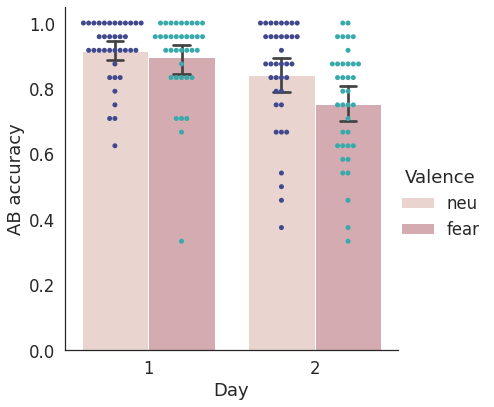

In [ ]:
#Graph of AB accuracy from end of day 1 to day 2
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(y = 'Accuracy', hue = 'Valence', x = 'Day', data = AB_Df, height=6, kind="bar", palette=sns.cubehelix_palette(), capsize=.1)
g = sns.swarmplot(y = 'Accuracy', hue = 'Valence', x = 'Day', data = AB_Df, palette = "mako", dodge=True)
plt.ylabel("AB accuracy")
g.legend_.remove()

In [ ]:
#paired t-tests for day 1 vs day 2 AB accuracy
print('Day1 Neutral vs. Fearful:')
print(stats.ttest_rel(master_df['AB3neuAcc'], master_df['AB3fearAcc']))
print('Day2 Neutral vs. Fearful:')
print(stats.ttest_rel(master_df['dABneuAcc'], master_df['dABfearAcc']))
print('Day1 Neutral vs Day2 Neutral:')
print(stats.ttest_rel(master_df['AB3neuAcc'], master_df['dABneuAcc']))
print('Day1 Fearful vs Day2 Fearful:')
print(stats.ttest_rel(master_df['AB3fearAcc'], master_df['dABfearAcc']))
print('Day1 Neutral vs Day2 Fearful:')
print(stats.ttest_rel(master_df['AB3neuAcc'], master_df['dABfearAcc']))
print('Day1 Fearful vs Day2 Neutral:')
print(stats.ttest_rel(master_df['AB3fearAcc'], master_df['dABneuAcc']))

Day1 Neutral vs. Fearful:
Ttest_relResult(statistic=1.4640310438662838, pvalue=0.15186365498612694)
Day2 Neutral vs. Fearful:
Ttest_relResult(statistic=4.739526071088152, pvalue=3.321071058353782e-05)
Day1 Neutral vs Day2 Neutral:
Ttest_relResult(statistic=3.535824501741878, pvalue=0.0011389534663749608)
Day1 Fearful vs Day2 Fearful:
Ttest_relResult(statistic=6.148761385122058, pvalue=4.3993917640557286e-07)
Day1 Neutral vs Day2 Fearful:
Ttest_relResult(statistic=6.554866241204537, pvalue=1.2685381912615715e-07)
Day1 Fearful vs Day2 Neutral:
Ttest_relResult(statistic=2.4825741318452104, pvalue=0.017841975272819773)


### AB Progression Graph

In [ ]:
#creates df of AB1, AB2, and AB3 accuracy
proAB_Df = pd.DataFrame()
proAB_Df['Accuracy'] = master_df['AB1neuAcc']
pt_len = len(master_df['AB1neuAcc'])
proAB_Df['Valence'] = ['neu'] * pt_len
proAB_Df['Test'] = ['AB1'] * pt_len

A_df = pd.DataFrame()
A_df['Accuracy'] = master_df['AB1fearAcc']
pt_len = len(master_df['AB1fearAcc'])
A_df['Valence'] = ['fear'] * pt_len
A_df['Test'] = ['AB1'] * pt_len

B_df = pd.DataFrame()
B_df['Accuracy'] = master_df['AB2neuAcc']
pt_len = len(master_df['AB2neuAcc'])
B_df['Valence'] = ['neu'] * pt_len
B_df['Test'] = ['AB2'] * pt_len

C_df = pd.DataFrame()
C_df['Accuracy'] = master_df['AB2fearAcc']
pt_len = len(master_df['AB2fearAcc'])
C_df['Valence'] = ['fear'] * pt_len
C_df['Test'] = ['AB2'] * pt_len

D_df = pd.DataFrame()
D_df['Accuracy'] = master_df['AB3neuAcc']
pt_len = len(master_df['AB3neuAcc'])
D_df['Valence'] = ['neu'] * pt_len
D_df['Test'] = ['AB3'] * pt_len

E_df = pd.DataFrame()
E_df['Accuracy'] = master_df['AB3fearAcc']
pt_len = len(master_df['AB3fearAcc'])
E_df['Valence'] = ['fear'] * pt_len
E_df['Test'] = ['AB3'] * pt_len

#concatenate all dfs into one df
proAB_Df = pd.concat([proAB_Df,A_df])
proAB_Df = pd.concat([proAB_Df,B_df])
proAB_Df = pd.concat([proAB_Df,C_df])
proAB_Df = pd.concat([proAB_Df,D_df])
proAB_Df = pd.concat([proAB_Df,E_df])

In [ ]:
#Neutral Accuracy

#means
AB1neuMeanAcc = average(master_df['AB1neuAcc'])
AB2neuMeanAcc = average(master_df['AB2neuAcc'])
AB3neuMeanAcc = average(master_df['AB3neuAcc'])

#standard deviations
AB1neuStdAcc = statistics.stdev(master_df['AB1neuAcc'])
AB2neuStdAcc = statistics.stdev(master_df['AB2neuAcc'])
AB3neuStdAcc = statistics.stdev(master_df['AB3neuAcc'])

#Fearful Accuracy

#means
AB1fearMeanAcc = average(master_df['AB1fearAcc'])
AB2fearMeanAcc = average(master_df['AB2fearAcc'])
AB3fearMeanAcc = average(master_df['AB3fearAcc'])

#standard deviations
AB1fearStdAcc = statistics.stdev(master_df['AB1fearAcc'])
AB2fearStdAcc = statistics.stdev(master_df['AB2fearAcc'])
AB3fearStdAcc = statistics.stdev(master_df['AB3fearAcc'])

#means and std lists
neutralAB_means = [AB1neuMeanAcc, AB2neuMeanAcc, AB3neuMeanAcc]
neutralAB_stds= [AB1neuStdAcc, AB2neuStdAcc, AB3neuStdAcc]

fearfulAB_means = [AB1fearMeanAcc, AB2fearMeanAcc, AB3fearMeanAcc]
fearfulAB_stds = [AB1fearStdAcc, AB2fearStdAcc, AB3fearStdAcc]

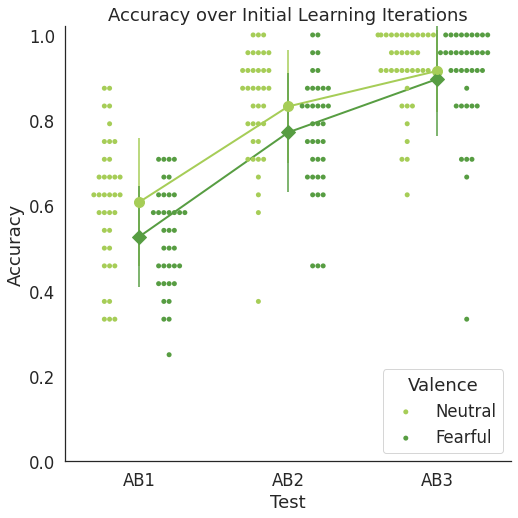

In [ ]:
red = '#c51b8a' #yellow 
blue = '#fa9fb5' #neutral

lightg= '#a6cd57'#'#a1d99b'
darkg= '#579d42'#'#31a354'

colors = [lightg, darkg]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(8, 8))

g = sns.swarmplot(x = "Test", y = "Accuracy", hue = "Valence", data = proAB_Df, palette = customPalette, dodge=True)
#plot.get_legend().set_visible(False)
#g.legend_.remove()
plt.legend(title = 'Valence', loc = 'lower right', labels = ['Neutral','Fearful'])
sns.despine()
proAB_Df.describe()
utneu = '#f8971f'
utemo = '#bf5700'
Tests = ['AB1', 'AB2', 'AB3']
ABmeans_df = pd.DataFrame({
    'Tests': Tests, 
    'Neutral Means': neutralAB_means,
    'Emotional Means': fearfulAB_means})
plt.plot('Tests', 'Neutral Means', data = ABmeans_df, linestyle='-', linewidth = 2,  marker='o', markersize = 10, color = lightg)
plt.errorbar(Tests, neutralAB_means, yerr = neutralAB_stds, fmt="o", color = lightg)
plt.plot('Tests', 'Emotional Means', data = ABmeans_df, linestyle='-', linewidth = 2, marker='D', markersize = 10, color = darkg)
plt.errorbar(Tests, fearfulAB_means, yerr = fearfulAB_stds, fmt="o", color = darkg)
plt.ylim (0,1.02)
plt.ylabel('Accuracy')
plt.title('Accuracy over Initial Learning Iterations')
#plt.legend(loc = 'lower right')
plt.savefig('ABprogression.png')
plt.show()

In [ ]:
#paired t-tests for AB Neutral vs Fearful in each iteratoin
print('AB1 Neutral vs. AB1 Fearful:')
print(stats.ttest_rel(master_df['AB1neuAcc'], master_df['AB1fearAcc']))
print('AB2 Neutral vs. AB2 Fearful:')
print(stats.ttest_rel(master_df['AB2neuAcc'], master_df['AB2fearAcc']))
print('AB3 Neutral vs AB3 Fearful:')
print(stats.ttest_rel(master_df['AB3neuAcc'], master_df['AB3fearAcc']))

AB1 Neutral vs. AB1 Fearful:
Ttest_relResult(statistic=3.754109664716364, pvalue=0.0006137495410147971)
AB2 Neutral vs. AB2 Fearful:
Ttest_relResult(statistic=3.154115691008633, pvalue=0.0032431326760447624)
AB3 Neutral vs AB3 Fearful:
Ttest_relResult(statistic=1.4640310438662838, pvalue=0.15186365498612694)


### BC/XY/AC Plots

In [ ]:
#Neutral Accuracy

#means
BCneuMeanAcc = average(master_df['BCneuAcc'])
XYneuMeanAcc = average(master_df['XYneuAcc'])
ACneuMeanAcc = average(master_df['adjACneuAcc'])
ACxneuMeanAcc = average(master_df['adjACxneuAcc'])
dBCneuMeanAcc = average(master_df['dBCneuAcc'])
dXYneuMeanAcc = average(master_df['dXYneuAcc'])

#standard deviations
BCneuStdAcc = statistics.stdev(master_df['BCneuAcc'])
XYneuStdAcc = statistics.stdev(master_df['XYneuAcc'])
ACneuStdAcc = statistics.stdev(master_df['adjACneuAcc'])
ACxneuStdAcc = statistics.stdev(master_df['adjACxneuAcc'])
dBCneuStdAcc = statistics.stdev(master_df['dBCneuAcc'])
dXYneuStdAcc = statistics.stdev(master_df['dXYneuAcc'])

#Fearful Accuracy

#means
BCfearMeanAcc = average(master_df['BCfearAcc'])
XYfearMeanAcc = average(master_df['XYfearAcc'])
ACfearMeanAcc = average(master_df['adjACfearAcc'])
ACxfearMeanAcc = average(master_df['adjACxfearAcc'])
dBCfearMeanAcc = average(master_df['dBCfearAcc'])
dXYfearMeanAcc = average(master_df['dXYfearAcc'])

#standard deviations
BCfearStdAcc = statistics.stdev(master_df['BCfearAcc'])
XYfearStdAcc = statistics.stdev(master_df['XYfearAcc'])
ACfearStdAcc = statistics.stdev(master_df['adjACfearAcc'])
ACxfearStdAcc = statistics.stdev(master_df['adjACxfearAcc'])
dBCfearStdAcc = statistics.stdev(master_df['dBCfearAcc'])
dXYfearStdAcc = statistics.stdev(master_df['dXYfearAcc'])

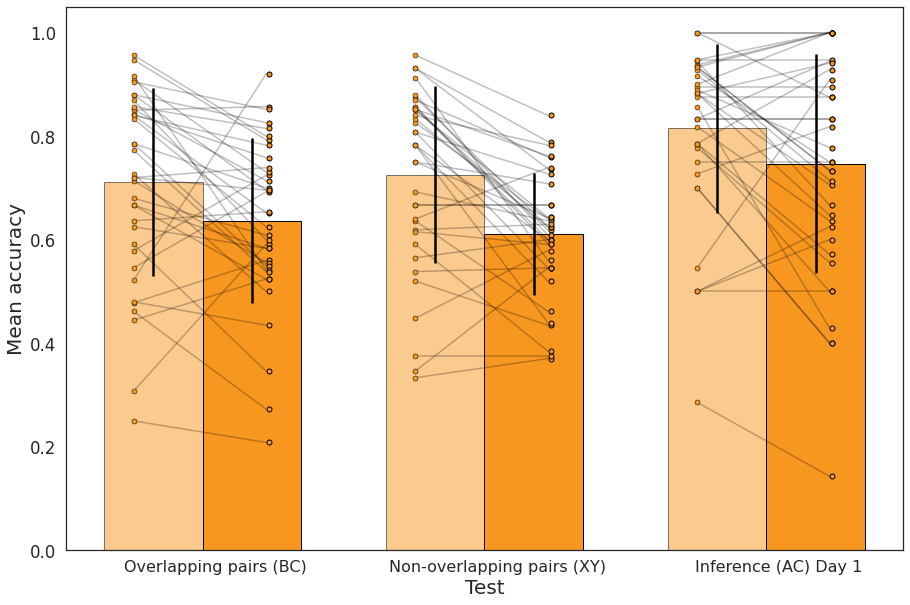

In [ ]:
#UT branded colors 
red = '#c51b8a' #yellow 
blue = '#fa9fb5' #neutral
white = '#ffffff'
black = '#333f48'
ut_red = '#bf5700' #emotional 
ut_blue = '#f8971f' #neutral
fig_blue= '#00a9b7' #neutral
fig_dblue= '#005f86' #emotional

neutral_means = [BCneuMeanAcc, XYneuMeanAcc, ACneuMeanAcc]
neutral_stds= [BCneuStdAcc, XYneuStdAcc, ACneuStdAcc]

fearful_means = [BCfearMeanAcc, XYfearMeanAcc, ACfearMeanAcc]
fearful_stds = [BCfearStdAcc, XYfearStdAcc, ACfearStdAcc]

fig, ax = plt.subplots(figsize=(15, 10))
ind = np.arange(3) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = ut_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= ut_blue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('BCneuAcc','BCfearAcc'),('XYneuAcc','XYfearAcc'),('adjACneuAcc','adjACfearAcc')]:
  h = master_df[j]
  d = master_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  ax.scatter(len(h)*[x1-0.07], h, c=ut_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=ut_blue, edgecolors= "black",
  s=25, lw=1, label='Emotional', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['Overlapping pairs (BC)', 'Non-overlapping pairs (XY)', 'Inference (AC) Day 1']
ax.set_xticks([0.22, 1.22, 2.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Mean accuracy', fontsize = 20)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

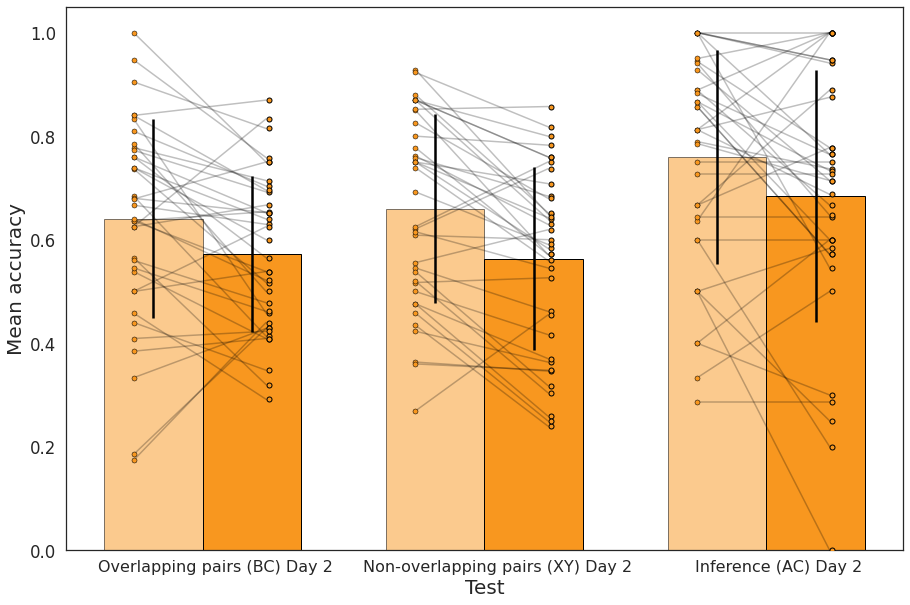

In [ ]:
neutral_means = [dBCneuMeanAcc, dXYneuMeanAcc, ACxneuMeanAcc]
neutral_stds= [dBCneuStdAcc, dXYneuStdAcc, ACxneuStdAcc]

fearful_means = [dBCfearMeanAcc, dXYfearMeanAcc, ACxfearMeanAcc]
fearful_stds = [dBCfearStdAcc, dXYfearStdAcc, ACxfearStdAcc]

fig, ax = plt.subplots(figsize=(15, 10))
ind = np.arange(3) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = ut_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= ut_blue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('dBCneuAcc','dBCfearAcc'),('dXYneuAcc','dXYfearAcc'),('adjACxneuAcc','adjACxfearAcc')]:
  h = master_df[j]
  d = master_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  ax.scatter(len(h)*[x1-0.07], h, c=ut_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=ut_blue, edgecolors= "black",
  s=25, lw=1, label='Emotional', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['Overlapping pairs (BC) Day 2', 'Non-overlapping pairs (XY) Day 2', 'Inference (AC) Day 2']
ax.set_xticks([0.22, 1.22, 2.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Mean accuracy', fontsize = 20)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

### BC/XY Comparison

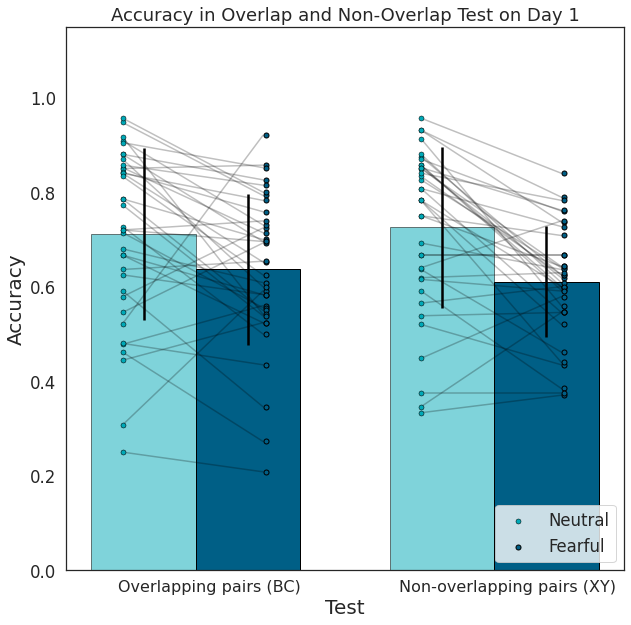

In [ ]:
neutral_means = [BCneuMeanAcc, XYneuMeanAcc]
neutral_stds= [BCneuStdAcc, XYneuStdAcc]

fearful_means = [BCfearMeanAcc, XYfearMeanAcc]
fearful_stds = [BCfearStdAcc, XYfearStdAcc]

fig, ax = plt.subplots(figsize=(10, 10))
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = fig_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= fig_dblue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('BCneuAcc','BCfearAcc'),('XYneuAcc','XYfearAcc')]:
  h = master_df[j]
  d = master_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  plt.legend(loc = 'lower right')
  ax.scatter(len(h)*[x1-0.07], h, c=fig_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=fig_dblue, edgecolors= "black",
  s=25, lw=1, label='Fearful', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['Overlapping pairs (BC)', 'Non-overlapping pairs (XY)']
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy in Overlap and Non-Overlap Test on Day 1')
plt.ylim(0,1.15)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

In [ ]:
#paired t-tests for AB Neutral vs Fearful in each iteratoin
print('BC Neutral vs. BC Fearful:')
print(stats.ttest_rel(master_df['BCneuAcc'], master_df['BCfearAcc']))
print('XY Neutral vs. XY Fearful:')
print(stats.ttest_rel(master_df['XYneuAcc'], master_df['XYfearAcc']))
print('BC Neutral vs XY Neutral:')
print(stats.ttest_rel(master_df['BCneuAcc'], master_df['XYneuAcc']))
print('BC Fearful vs XY Fearful:')
print(stats.ttest_rel(master_df['BCfearAcc'], master_df['XYfearAcc']))

BC Neutral vs. BC Fearful:
Ttest_relResult(statistic=2.9728011638323077, pvalue=0.0052362455939839285)
XY Neutral vs. XY Fearful:
Ttest_relResult(statistic=5.233385343988147, pvalue=7.3505084701457725e-06)
BC Neutral vs XY Neutral:
Ttest_relResult(statistic=-0.7233435647491867, pvalue=0.4741428264010934)
BC Fearful vs XY Fearful:
Ttest_relResult(statistic=1.1275931292406636, pvalue=0.2669512906720323)


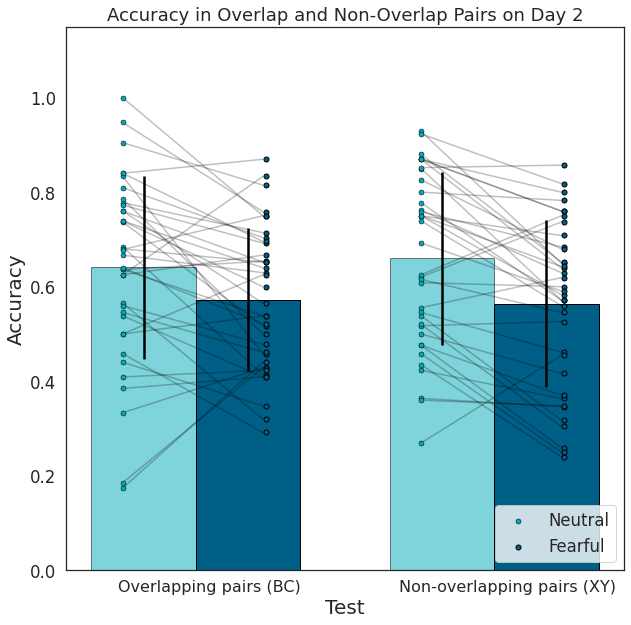

In [ ]:
neutral_means = [dBCneuMeanAcc, dXYneuMeanAcc]
neutral_stds= [dBCneuStdAcc, dXYneuStdAcc]

fearful_means = [dBCfearMeanAcc, dXYfearMeanAcc]
fearful_stds = [dBCfearStdAcc, dXYfearStdAcc]

fig, ax = plt.subplots(figsize=(10, 10))
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = fig_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= fig_dblue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('dBCneuAcc','dBCfearAcc'),('dXYneuAcc','dXYfearAcc')]:
  h = master_df[j]
  d = master_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  plt.legend(loc = 'lower right')
  ax.scatter(len(h)*[x1-0.07], h, c=fig_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=fig_dblue, edgecolors= "black",
  s=25, lw=1, label='Fearful', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['Overlapping pairs (BC)', 'Non-overlapping pairs (XY)']
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy in Overlap and Non-Overlap Pairs on Day 2')
plt.ylim(0,1.15)
ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

In [ ]:
#paired t-tests for AB Neutral vs Fearful in each iteratoin
print('BC Neutral vs. BC Fearful:')
print(stats.ttest_rel(master_df['dBCneuAcc'], master_df['dBCfearAcc']))
print('XY Neutral vs. XY Fearful:')
print(stats.ttest_rel(master_df['dXYneuAcc'], master_df['dXYfearAcc']))
print('BC Neutral vs XY Neutral:')
print(stats.ttest_rel(master_df['dBCneuAcc'], master_df['dXYneuAcc']))
print('BC Fearful vs XY Fearful:')
print(stats.ttest_rel(master_df['dBCfearAcc'], master_df['dXYfearAcc']))

BC Neutral vs. BC Fearful:
Ttest_relResult(statistic=2.8495313604933976, pvalue=0.007198348979461106)
XY Neutral vs. XY Fearful:
Ttest_relResult(statistic=5.251669427142368, pvalue=6.949319563467672e-06)
BC Neutral vs XY Neutral:
Ttest_relResult(statistic=-0.8960677484940184, pvalue=0.37616954490801746)
BC Fearful vs XY Fearful:
Ttest_relResult(statistic=0.4324231779595066, pvalue=0.6680132787376998)


### AC in New Format

(0.0, 1.19)

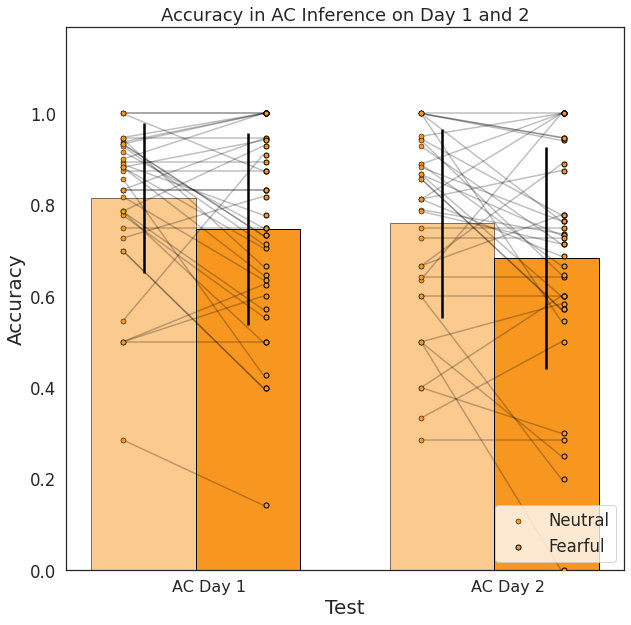

In [ ]:
neutral_means = [ACneuMeanAcc, ACxneuMeanAcc]
neutral_stds= [ACneuStdAcc, ACxneuStdAcc]

fearful_means = [ACfearMeanAcc, ACxfearMeanAcc]
fearful_stds = [ACfearStdAcc, ACxfearStdAcc]

fig, ax = plt.subplots(figsize=(10, 10))
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = ut_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= ut_blue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('adjACneuAcc','adjACfearAcc'),('adjACxneuAcc','adjACxfearAcc')]:
  h = master_df[j]
  d = master_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  plt.legend(loc = 'lower right')
  ax.scatter(len(h)*[x1-0.07], h, c=ut_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=ut_blue, edgecolors= "black",
  s=25, lw=1, label='Fearful', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['AC Day 1', 'AC Day 2']
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy in AC Inference on Day 1 and 2')

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

plt.ylim([0,1.19])

In [ ]:
#paired t-tests for AC Day 1 vs Day 2
print('Day1 Neutral vs. Fearful:')
print(stats.ttest_rel(master_df['adjACneuAcc'], master_df['adjACfearAcc']))
print('Day2 Neutral vs. Fearful:')
print(stats.ttest_rel(master_df['adjACxneuAcc'], master_df['adjACxfearAcc']))
print('Day1 Neutral vs Day2 Neutral:')
print(stats.ttest_rel(master_df['adjACneuAcc'], master_df['adjACxneuAcc']))
print('Day1 Fearful vs Day2 Fearful:')
print(stats.ttest_rel(master_df['adjACfearAcc'], master_df['adjACxfearAcc']))
print('Day1 Neutral vs Day2 Fearful:')
print(stats.ttest_rel(master_df['adjACneuAcc'], master_df['adjACxfearAcc']))
print('Day1 Fearful vs Day2 Neutral:')
print(stats.ttest_rel(master_df['adjACfearAcc'], master_df['adjACxneuAcc']))

Day1 Neutral vs. Fearful:
Ttest_relResult(statistic=2.482685474831988, pvalue=0.017837234327739353)
Day2 Neutral vs. Fearful:
Ttest_relResult(statistic=2.347236652370887, pvalue=0.02453115351041975)
Day1 Neutral vs Day2 Neutral:
Ttest_relResult(statistic=2.2850553497527257, pvalue=0.02830526127093055)
Day1 Fearful vs Day2 Fearful:
Ttest_relResult(statistic=1.9441593436985625, pvalue=0.05972308939912887)
Day1 Neutral vs Day2 Fearful:
Ttest_relResult(statistic=3.993907470910108, pvalue=0.0003068927103976127)
Day1 Fearful vs Day2 Neutral:
Ttest_relResult(statistic=-0.3851295378944745, pvalue=0.7024076034872249)


### Multiple Regression

In [ ]:
#cleaning words
master_df['sleep1'][34] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#clean qualtrics data - make all inputs floats
master_df['sleep1'] = [float(x) for x in master_df['sleep1']]
master_df['sleep2'] = [float(x) for x in master_df['sleep2']]

Text(0.5, 1.0, 'AC Day 1 vs Sleep on Day 1')

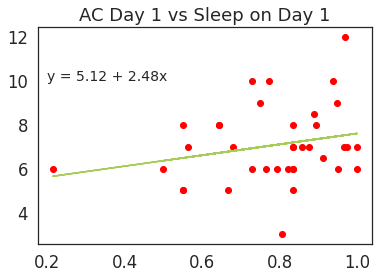

In [ ]:
#check linearity
x = master_df['adjACallAcc']
y = master_df['sleep1']
plt.scatter(x, y, color='red')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.text(0.2,10, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.title('AC Day 1 vs Sleep on Day 1')

Text(0.5, 1.0, 'AC Day 1 vs Anxiety Score on Day 1')

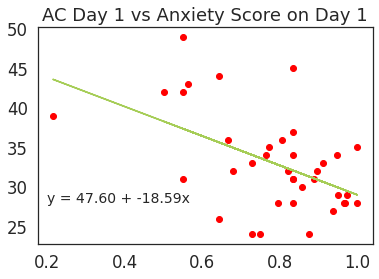

In [ ]:
#check linearity
x = master_df['adjACallAcc']
y = master_df['score1']
plt.scatter(x, y, color='red')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.text(0.2,28, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.title('AC Day 1 vs Anxiety Score on Day 1')

Text(0.5, 1.0, 'AC Day 1 vs Alertness on Day 1')

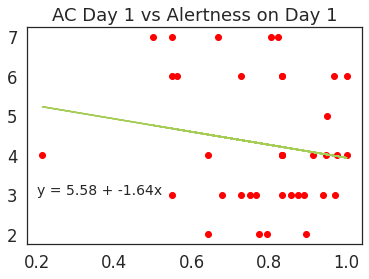

In [ ]:
#check linearity
x = master_df['adjACallAcc']
y = master_df['alert1']
plt.scatter(x, y, color='red')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.text(0.2,3, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.title('AC Day 1 vs Alertness on Day 1')

In [ ]:
#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = master_df[['sleep1','score1','alert1']], master_df.adjACallAcc

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.2961475485082349


Text(0.5, 1.0, 'AC Day 2 vs Sleep on Day 2')

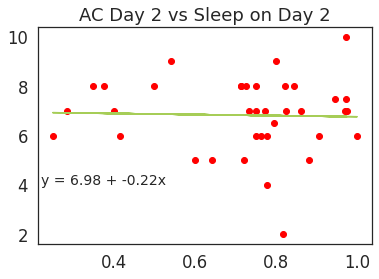

In [ ]:
#check linearity
x = master_df['adjACxallAcc']
y = master_df['sleep2']
plt.scatter(x, y, color='red')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.text(0.22,4, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.title('AC Day 2 vs Sleep on Day 2')
#hours of sleep

Text(0.5, 1.0, 'AC Day 2 vs Anxiety Score on Day 2')

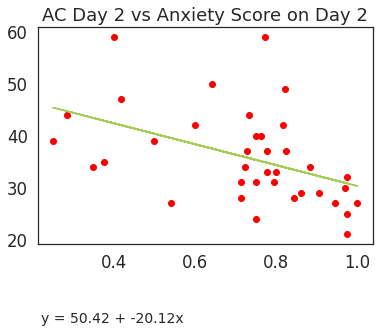

In [ ]:
#check linearity
x = master_df['adjACxallAcc']
y = master_df['score2']
plt.scatter(x, y, color='red')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.text(0.22,4, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.title('AC Day 2 vs Anxiety Score on Day 2')
#lower anxiety score is no or low anxiety

Text(0.5, 1.0, 'AC Day 2 vs Alertness on Day 2')

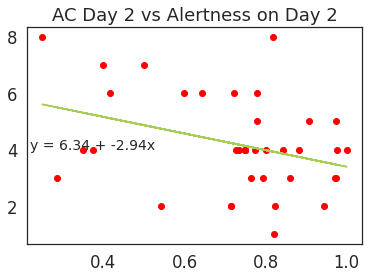

In [ ]:
#check linearity
x = master_df['adjACxallAcc']
y = master_df['alert2']
plt.scatter(x, y, color='red')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.text(0.22,4, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.title('AC Day 2 vs Alertness on Day 2')
#lower is more alert - higher is more sleepy

In [ ]:
#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = master_df[['sleep2','score2','alert2']], master_df.adjACxallAcc

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.3126286671661086


### OLS Regression

In [ ]:
#fit multiple linear regression model for day 1
model = ols('adjACallAcc ~ sleep1 + score1 + alert1 + caff1 + alc1', data = master_df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            adjACallAcc   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     3.778
Date:                Tue, 29 Nov 2022   Prob (F-statistic):            0.00869
Time:                        03:55:43   Log-Likelihood:                 22.461
No. Observations:                  37   AIC:                            -32.92
Df Residuals:                      31   BIC:                            -23.26
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0668      0.212      5.028      0.0

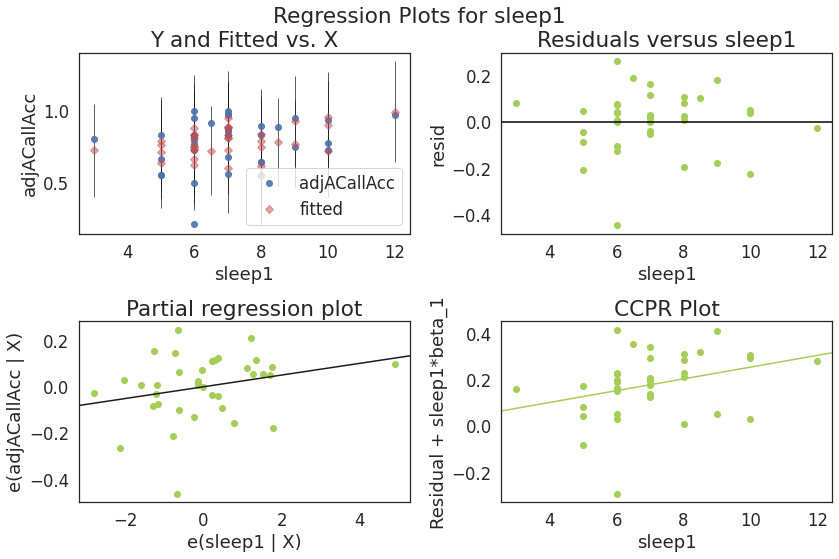

In [ ]:
#create residual vs. predictor plot for sleep on Day 1
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'sleep1', fig=fig)

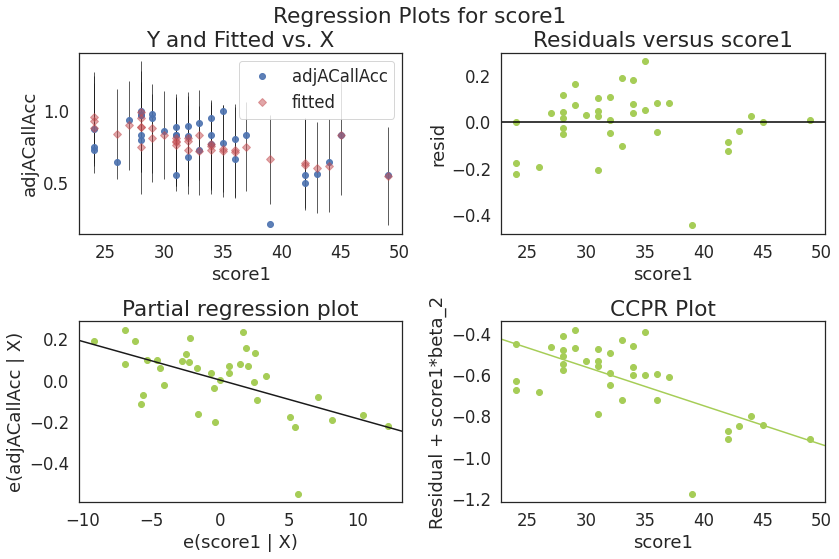

In [ ]:
#create residual vs. predictor plot for anxiety score
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'score1', fig=fig)

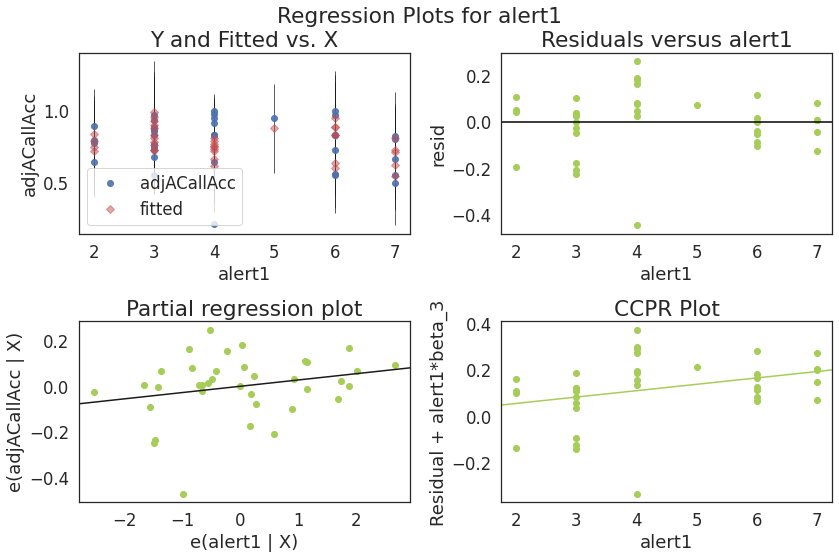

In [ ]:
#create residual vs. predictor plot for alertness
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'alert1', fig=fig)

In [ ]:
#perform Durbin Watson test for independence of residuals
durbin_watson(model.resid)

2.1698288293047967

In [ ]:
#fit multiple linear regression model for day 2
model = ols('adjACxallAcc ~ sleep2 + score2 + alert2 + caff2 + alc2', data = master_df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           adjACxallAcc   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     5.255
Date:                Tue, 29 Nov 2022   Prob (F-statistic):            0.00131
Time:                        03:55:47   Log-Likelihood:                 18.173
No. Observations:                  37   AIC:                            -24.35
Df Residuals:                      31   BIC:                            -14.68
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2416      0.232      5.345      0.0

### Anxiety on Day 1 and Day 2

In [ ]:
anx1_df = master_df.loc[master_df['rate1']!='no or low anxiety']
anx2_df = master_df.loc[master_df['rate2']!='no or low anxiety']

In [ ]:
#Neutral Accuracy

#means
a1BCneuMeanAcc = average(anx1_df['BCneuAcc'])
a1XYneuMeanAcc = average(anx1_df['XYneuAcc'])
a1ACneuMeanAcc = average(anx1_df['adjACneuAcc'])
a1ACxneuMeanAcc = average(anx1_df['adjACxneuAcc'])
a1dBCneuMeanAcc = average(anx1_df['dBCneuAcc'])
a1dXYneuMeanAcc = average(anx1_df['dXYneuAcc'])

#standard deviations
a1BCneuStdAcc = statistics.stdev(anx1_df['BCneuAcc'])
a1XYneuStdAcc = statistics.stdev(anx1_df['XYneuAcc'])
a1ACneuStdAcc = statistics.stdev(anx1_df['adjACneuAcc'])
a1ACxneuStdAcc = statistics.stdev(anx1_df['adjACxneuAcc'])
a1dBCneuStdAcc = statistics.stdev(anx1_df['dBCneuAcc'])
a1dXYneuStdAcc = statistics.stdev(anx1_df['dXYneuAcc'])

#Fearful Accuracy

#means
a1BCfearMeanAcc = average(anx1_df['BCfearAcc'])
a1XYfearMeanAcc = average(anx1_df['XYfearAcc'])
a1ACfearMeanAcc = average(anx1_df['adjACfearAcc'])
a1ACxfearMeanAcc = average(anx1_df['adjACxfearAcc'])
a1dBCfearMeanAcc = average(anx1_df['dBCfearAcc'])
a1dXYfearMeanAcc = average(anx1_df['dXYfearAcc'])

#standard deviations
a1BCfearStdAcc = statistics.stdev(anx1_df['BCfearAcc'])
a1XYfearStdAcc = statistics.stdev(anx1_df['XYfearAcc'])
a1ACfearStdAcc = statistics.stdev(anx1_df['adjACfearAcc'])
a1ACxfearStdAcc = statistics.stdev(anx1_df['adjACxfearAcc'])
a1dBCfearStdAcc = statistics.stdev(anx1_df['dBCfearAcc'])
a1dXYfearStdAcc = statistics.stdev(anx1_df['dXYfearAcc'])

In [ ]:
#Neutral Accuracy

#means
a2BCneuMeanAcc = average(anx2_df['BCneuAcc'])
a2XYneuMeanAcc = average(anx2_df['XYneuAcc'])
a2ACneuMeanAcc = average(anx2_df['adjACneuAcc'])
a2ACxneuMeanAcc = average(anx2_df['adjACxneuAcc'])
a2dBCneuMeanAcc = average(anx2_df['dBCneuAcc'])
a2dXYneuMeanAcc = average(anx2_df['dXYneuAcc'])

#standard deviations
a2BCneuStdAcc = statistics.stdev(anx2_df['BCneuAcc'])
a2XYneuStdAcc = statistics.stdev(anx2_df['XYneuAcc'])
a2ACneuStdAcc = statistics.stdev(anx2_df['adjACneuAcc'])
a2ACxneuStdAcc = statistics.stdev(anx2_df['adjACxneuAcc'])
a2dBCneuStdAcc = statistics.stdev(anx2_df['dBCneuAcc'])
a2dXYneuStdAcc = statistics.stdev(anx2_df['dXYneuAcc'])

#Fearful Accuracy

#means
a2BCfearMeanAcc = average(anx2_df['BCfearAcc'])
a2XYfearMeanAcc = average(anx2_df['XYfearAcc'])
a2ACfearMeanAcc = average(anx2_df['adjACfearAcc'])
a2ACxfearMeanAcc = average(anx2_df['adjACxfearAcc'])
a2dBCfearMeanAcc = average(anx2_df['dBCfearAcc'])
a2dXYfearMeanAcc = average(anx2_df['dXYfearAcc'])

#standard deviations
a2BCfearStdAcc = statistics.stdev(anx2_df['BCfearAcc'])
a2XYfearStdAcc = statistics.stdev(anx2_df['XYfearAcc'])
a2ACfearStdAcc = statistics.stdev(anx2_df['adjACfearAcc'])
a2ACxfearStdAcc = statistics.stdev(anx2_df['adjACxfearAcc'])
a2dBCfearStdAcc = statistics.stdev(anx2_df['dBCfearAcc'])
a2dXYfearStdAcc = statistics.stdev(anx2_df['dXYfearAcc'])

### Anxiety Day 1 BC/XY


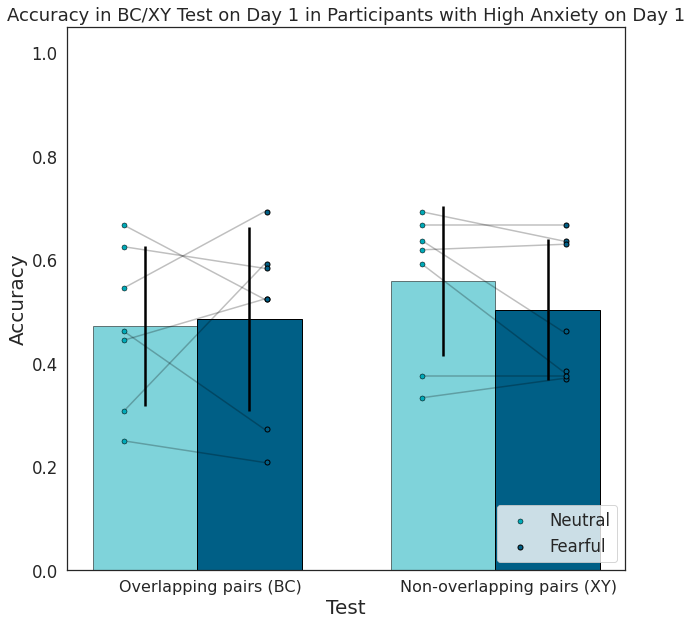

In [ ]:
neutral_means = [a1BCneuMeanAcc, a1XYneuMeanAcc]
neutral_stds= [a1BCneuStdAcc, a1XYneuStdAcc]

fearful_means = [a1BCfearMeanAcc, a1XYfearMeanAcc]
fearful_stds = [a1BCfearStdAcc, a1XYfearStdAcc]

fig, ax = plt.subplots(figsize=(10, 10))
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = fig_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= fig_dblue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('BCneuAcc','BCfearAcc'),('XYneuAcc','XYfearAcc')]:
  h = anx1_df[j]
  d = anx1_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  plt.legend(loc = 'lower right')
  ax.scatter(len(h)*[x1-0.07], h, c=fig_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=fig_dblue, edgecolors= "black",
  s=25, lw=1, label='Fearful', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['Overlapping pairs (BC)', 'Non-overlapping pairs (XY)']
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy in BC/XY Test on Day 1 in Participants with High Anxiety on Day 1')
plt.ylim(0,1.05)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

In [ ]:
#paired t-tests
print('BC Neutral vs. BC Fearful:')
print(stats.ttest_rel(anx1_df['BCneuAcc'], anx1_df['BCfearAcc']))
print('XY Neutral vs. XY Fearful:')
print(stats.ttest_rel(anx1_df['XYneuAcc'], anx1_df['XYfearAcc']))
print('BC Neutral vs XY Neutral:')
print(stats.ttest_rel(anx1_df['BCneuAcc'], anx1_df['XYneuAcc']))
print('BC Fearful vs XY Fearful:')
print(stats.ttest_rel(anx1_df['BCfearAcc'], anx1_df['XYfearAcc']))

BC Neutral vs. BC Fearful:
Ttest_relResult(statistic=-0.21436970360854696, pvalue=0.8373586293484514)
XY Neutral vs. XY Fearful:
Ttest_relResult(statistic=1.5227021343494074, pvalue=0.17866172791058624)
BC Neutral vs XY Neutral:
Ttest_relResult(statistic=-1.7055504965003028, pvalue=0.13897055612513787)
BC Fearful vs XY Fearful:
Ttest_relResult(statistic=-0.30989158425190494, pvalue=0.7671243843778119)


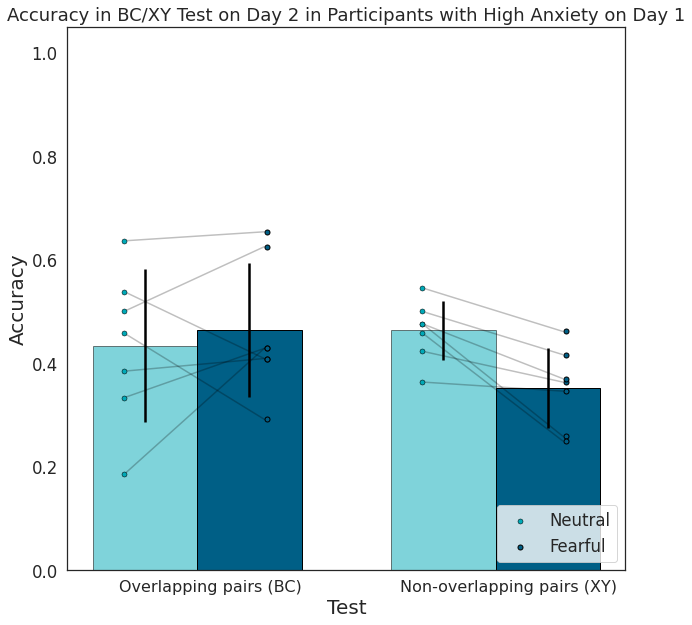

In [ ]:
neutral_means = [a1dBCneuMeanAcc, a1dXYneuMeanAcc]
neutral_stds= [a1dBCneuStdAcc, a1dXYneuStdAcc]

fearful_means = [a1dBCfearMeanAcc, a1dXYfearMeanAcc]
fearful_stds = [a1dBCfearStdAcc, a1dXYfearStdAcc]

fig, ax = plt.subplots(figsize=(10, 10))
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = fig_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= fig_dblue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('dBCneuAcc','dBCfearAcc'),('dXYneuAcc','dXYfearAcc')]:
  h = anx1_df[j]
  d = anx1_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  plt.legend(loc = 'lower right')
  ax.scatter(len(h)*[x1-0.07], h, c=fig_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=fig_dblue, edgecolors= "black",
  s=25, lw=1, label='Fearful', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['Overlapping pairs (BC)', 'Non-overlapping pairs (XY)']
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy in BC/XY Test on Day 2 in Participants with High Anxiety on Day 1')
plt.ylim(0,1.05)
ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

In [ ]:
#paired t-tests
print('BC Neutral vs. BC Fearful:')
print(stats.ttest_rel(anx1_df['dBCneuAcc'], anx1_df['dBCfearAcc']))
print('XY Neutral vs. XY Fearful:')
print(stats.ttest_rel(anx1_df['dXYneuAcc'], anx1_df['dXYfearAcc']))
print('BC Neutral vs XY Neutral:')
print(stats.ttest_rel(anx1_df['dBCneuAcc'], anx1_df['dXYneuAcc']))
print('BC Fearful vs XY Fearful:')
print(stats.ttest_rel(anx1_df['dBCfearAcc'], anx1_df['dXYfearAcc']))

BC Neutral vs. BC Fearful:
Ttest_relResult(statistic=-0.5529841957763717, pvalue=0.6002551561894387)
XY Neutral vs. XY Fearful:
Ttest_relResult(statistic=3.9142144993396495, pvalue=0.007854156318060647)
BC Neutral vs XY Neutral:
Ttest_relResult(statistic=-0.42670157068882353, pvalue=0.6844826779203712)
BC Fearful vs XY Fearful:
Ttest_relResult(statistic=2.5220465525640536, pvalue=0.04516208119830196)


### Anxiety Day 1 AC

(0.0, 1.05)

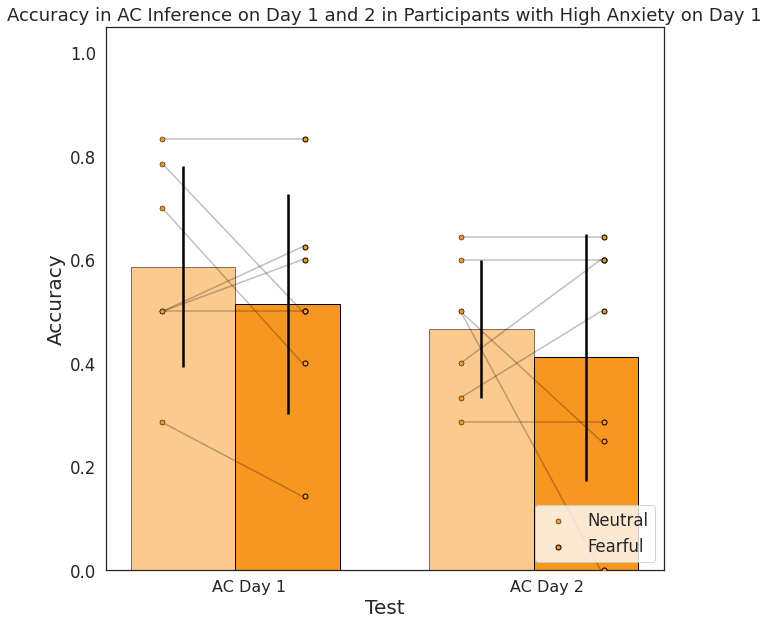

In [ ]:
neutral_means = [a1ACneuMeanAcc, a1ACxneuMeanAcc]
neutral_stds= [a1ACneuStdAcc, a1ACxneuStdAcc]

fearful_means = [a1ACfearMeanAcc, a1ACxfearMeanAcc]
fearful_stds = [a1ACfearStdAcc, a1ACxfearStdAcc]

fig, ax = plt.subplots(figsize=(10, 10))
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = ut_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= ut_blue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('adjACneuAcc','adjACfearAcc'),('adjACxneuAcc','adjACxfearAcc')]:
  h = anx1_df[j]
  d = anx1_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  plt.legend(loc = 'lower right')
  ax.scatter(len(h)*[x1-0.07], h, c=ut_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=ut_blue, edgecolors= "black",
  s=25, lw=1, label='Fearful', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['AC Day 1', 'AC Day 2']
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy in AC Inference on Day 1 and 2 in Participants with High Anxiety on Day 1')

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

plt.ylim([0,1.05])

In [ ]:
#paired t-tests for AC Day 1 vs Day 2
print('Day1 Neutral vs. Fearful:')
print(stats.ttest_rel(anx1_df['adjACneuAcc'], anx1_df['adjACfearAcc']))
print('Day2 Neutral vs. Fearful:')
print(stats.ttest_rel(anx1_df['adjACxneuAcc'], anx1_df['adjACxfearAcc']))
print('Day1 Neutral vs Day2 Neutral:')
print(stats.ttest_rel(anx1_df['adjACneuAcc'], anx1_df['adjACxneuAcc']))
print('Day1 Fearful vs Day2 Fearful:')
print(stats.ttest_rel(anx1_df['adjACfearAcc'], anx1_df['adjACxfearAcc']))
print('Day1 Neutral vs Day2 Fearful:')
print(stats.ttest_rel(anx1_df['adjACneuAcc'], anx1_df['adjACxfearAcc']))
print('Day1 Fearful vs Day2 Neutral:')
print(stats.ttest_rel(anx1_df['adjACfearAcc'], anx1_df['adjACxneuAcc']))

Day1 Neutral vs. Fearful:
Ttest_relResult(statistic=1.0945151089679919, pvalue=0.3157098597187533)
Day2 Neutral vs. Fearful:
Ttest_relResult(statistic=0.5920838512786822, pvalue=0.5754107760806073)
Day1 Neutral vs Day2 Neutral:
Ttest_relResult(statistic=1.7953128273780443, pvalue=0.12274657106940468)
Day1 Fearful vs Day2 Fearful:
Ttest_relResult(statistic=0.9386920933992797, pvalue=0.384121573199753)
Day1 Neutral vs Day2 Fearful:
Ttest_relResult(statistic=2.273980026976719, pvalue=0.06332077466182022)
Day1 Fearful vs Day2 Neutral:
Ttest_relResult(statistic=0.5164085877896301, pvalue=0.6240424184800641)


### Anxiety Day 2 BC/XY

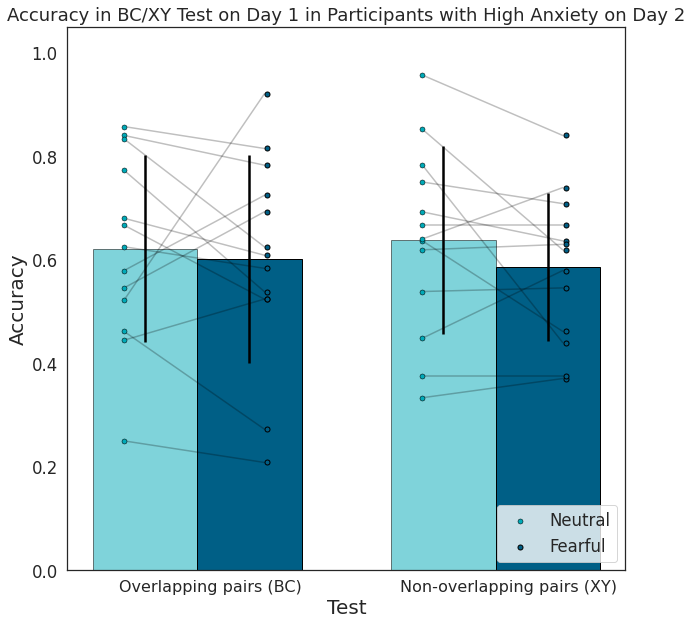

In [ ]:
neutral_means = [a2BCneuMeanAcc, a2XYneuMeanAcc]
neutral_stds= [a2BCneuStdAcc, a2XYneuStdAcc]

fearful_means = [a2BCfearMeanAcc, a2XYfearMeanAcc]
fearful_stds = [a2BCfearStdAcc, a2XYfearStdAcc]

fig, ax = plt.subplots(figsize=(10, 10))
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = fig_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= fig_dblue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('BCneuAcc','BCfearAcc'),('XYneuAcc','XYfearAcc')]:
  h = anx2_df[j]
  d = anx2_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  plt.legend(loc = 'lower right')
  ax.scatter(len(h)*[x1-0.07], h, c=fig_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=fig_dblue, edgecolors= "black",
  s=25, lw=1, label='Fearful', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['Overlapping pairs (BC)', 'Non-overlapping pairs (XY)']
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy in BC/XY Test on Day 1 in Participants with High Anxiety on Day 2')
plt.ylim(0,1.05)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

In [ ]:
#paired t-tests
print('BC Neutral vs. BC Fearful:')
print(stats.ttest_rel(anx2_df['BCneuAcc'], anx2_df['BCfearAcc']))
print('XY Neutral vs. XY Fearful:')
print(stats.ttest_rel(anx2_df['XYneuAcc'], anx2_df['XYfearAcc']))
print('BC Neutral vs XY Neutral:')
print(stats.ttest_rel(anx2_df['BCneuAcc'], anx2_df['XYneuAcc']))
print('BC Fearful vs XY Fearful:')
print(stats.ttest_rel(anx2_df['BCfearAcc'], anx2_df['XYfearAcc']))

BC Neutral vs. BC Fearful:
Ttest_relResult(statistic=0.4088069518997508, pvalue=0.6898827779012245)
XY Neutral vs. XY Fearful:
Ttest_relResult(statistic=1.4139908267595518, pvalue=0.18278067754250693)
BC Neutral vs XY Neutral:
Ttest_relResult(statistic=-0.4613066621301634, pvalue=0.6528282917961648)
BC Fearful vs XY Fearful:
Ttest_relResult(statistic=0.41066808933138427, pvalue=0.6885539735328527)


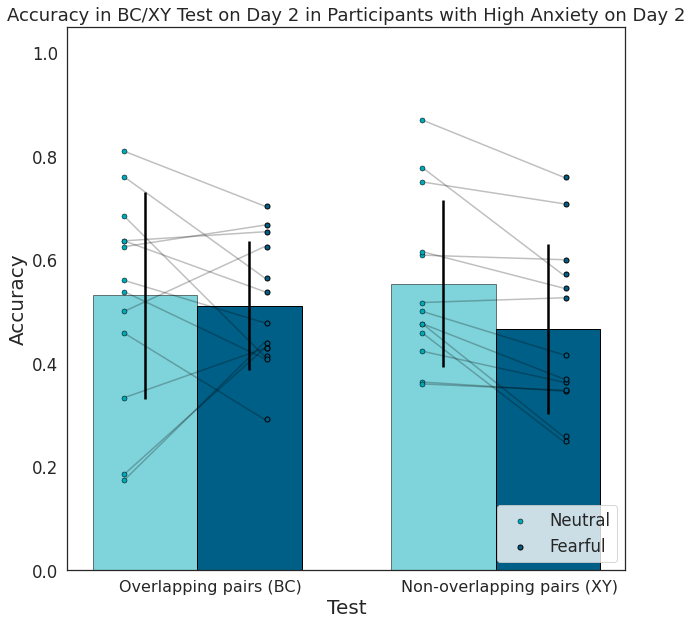

In [ ]:
neutral_means = [a2dBCneuMeanAcc, a2dXYneuMeanAcc]
neutral_stds= [a2dBCneuStdAcc, a2dXYneuStdAcc]

fearful_means = [a2dBCfearMeanAcc, a2dXYfearMeanAcc]
fearful_stds = [a2dBCfearStdAcc, a2dXYfearStdAcc]

fig, ax = plt.subplots(figsize=(10, 10))
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = fig_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= fig_dblue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('dBCneuAcc','dBCfearAcc'),('dXYneuAcc','dXYfearAcc')]:
  h = anx2_df[j]
  d = anx2_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  plt.legend(loc = 'lower right')
  ax.scatter(len(h)*[x1-0.07], h, c=fig_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=fig_dblue, edgecolors= "black",
  s=25, lw=1, label='Fearful', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['Overlapping pairs (BC)', 'Non-overlapping pairs (XY)']
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy in BC/XY Test on Day 2 in Participants with High Anxiety on Day 2')
plt.ylim(0,1.05)
ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

In [ ]:
#paired t-tests
print('BC Neutral vs. BC Fearful:')
print(stats.ttest_rel(anx2_df['dBCneuAcc'], anx2_df['dBCfearAcc']))
print('XY Neutral vs. XY Fearful:')
print(stats.ttest_rel(anx2_df['dXYneuAcc'], anx2_df['dXYfearAcc']))
print('BC Neutral vs XY Neutral:')
print(stats.ttest_rel(anx2_df['dBCneuAcc'], anx2_df['dXYneuAcc']))
print('BC Fearful vs XY Fearful:')
print(stats.ttest_rel(anx2_df['dBCfearAcc'], anx2_df['dXYfearAcc']))

BC Neutral vs. BC Fearful:
Ttest_relResult(statistic=0.42818750615111206, pvalue=0.6760992465428282)
XY Neutral vs. XY Fearful:
Ttest_relResult(statistic=3.950162828185187, pvalue=0.0019272244175977534)
BC Neutral vs XY Neutral:
Ttest_relResult(statistic=-0.5478378044318738, pvalue=0.5938473891014564)
BC Fearful vs XY Fearful:
Ttest_relResult(statistic=1.1494423799374451, pvalue=0.2727677616282686)


### Anxiety Day 2 AC

(0.0, 1.05)

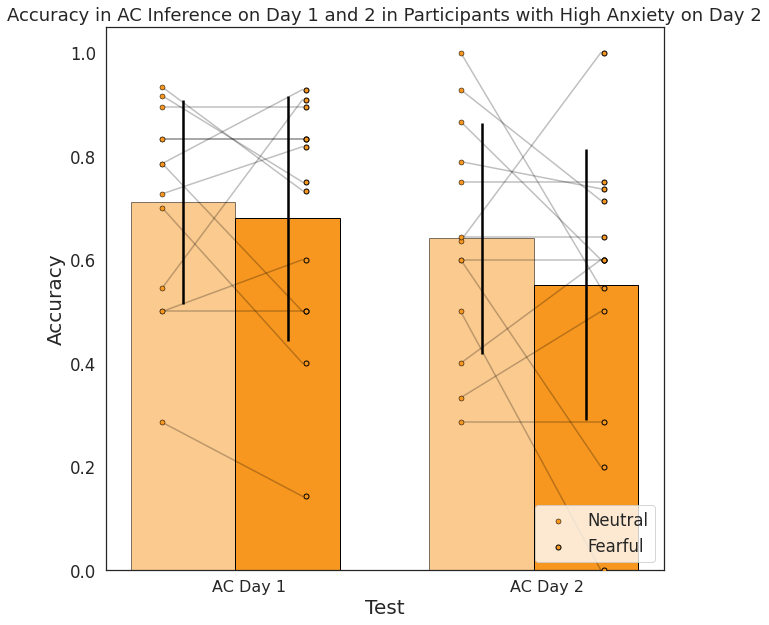

In [ ]:
neutral_means = [a2ACneuMeanAcc, a2ACxneuMeanAcc]
neutral_stds= [a2ACneuStdAcc, a2ACxneuStdAcc]

fearful_means = [a2ACfearMeanAcc, a2ACxfearMeanAcc]
fearful_stds = [a2ACfearStdAcc, a2ACxfearStdAcc]

fig, ax = plt.subplots(figsize=(10, 10))
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color = ut_blue,
    #hatch = '.',
    edgecolor = "black",
    alpha = 0.5,
    yerr = neutral_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, fearful_means, width,
    color= ut_blue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr = fearful_stds,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

i = 0.2
for j, k in [('adjACneuAcc','adjACfearAcc'),('adjACxneuAcc','adjACxfearAcc')]:
  h = anx2_df[j]
  d = anx2_df[k]
  # Set up the x-axis values
  x1 = i - 0.2
  x2 = i + 0.2
  line_color = ["black"]
  line_colors = np.repeat(line_color, len(h))
  alphas = [0.25]*len(line_colors)

  # Plot the lines connecting the dots
  for hi, di, ci, ai in zip(h, d, line_colors, alphas):
      ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
      # Plot the points
      # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
  plt.legend(loc = 'lower right')
  ax.scatter(len(h)*[x1-0.07], h, c=ut_blue, edgecolors= "black",
  s=25, lw=0.5, label='Neutral', zorder=10)
  ax.scatter(len(d)*[x2+0.01], d, c=ut_blue, edgecolors= "black",
  s=25, lw=1, label='Fearful', zorder=10)
  i += 1

# Fix the axes and labels 
lbls = ['AC Day 1', 'AC Day 2']
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy in AC Inference on Day 1 and 2 in Participants with High Anxiety on Day 2')

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

plt.ylim([0,1.05])

In [ ]:
#paired t-tests for AC Day 1 vs Day 2
print('Day1 Neutral vs. Fearful:')
print(stats.ttest_rel(anx2_df['adjACneuAcc'], anx2_df['adjACfearAcc']))
print('Day2 Neutral vs. Fearful:')
print(stats.ttest_rel(anx2_df['adjACxneuAcc'], anx2_df['adjACxfearAcc']))
print('Day1 Neutral vs Day2 Neutral:')
print(stats.ttest_rel(anx2_df['adjACneuAcc'], anx2_df['adjACxneuAcc']))
print('Day1 Fearful vs Day2 Fearful:')
print(stats.ttest_rel(anx2_df['adjACfearAcc'], anx2_df['adjACxfearAcc']))
print('Day1 Neutral vs Day2 Fearful:')
print(stats.ttest_rel(anx2_df['adjACneuAcc'], anx2_df['adjACxfearAcc']))
print('Day1 Fearful vs Day2 Neutral:')
print(stats.ttest_rel(anx2_df['adjACfearAcc'], anx2_df['adjACxneuAcc']))

Day1 Neutral vs. Fearful:
Ttest_relResult(statistic=0.5908128885355826, pvalue=0.5656076899149045)
Day2 Neutral vs. Fearful:
Ttest_relResult(statistic=1.2186013493743084, pvalue=0.24641088481363704)
Day1 Neutral vs Day2 Neutral:
Ttest_relResult(statistic=1.3342949073506307, pvalue=0.20687506521936133)
Day1 Fearful vs Day2 Fearful:
Ttest_relResult(statistic=1.7917786512607268, pvalue=0.09839997577679287)
Day1 Neutral vs Day2 Fearful:
Ttest_relResult(statistic=2.11266875748739, pvalue=0.05626397682702787)
Day1 Fearful vs Day2 Neutral:
Ttest_relResult(statistic=0.6664604522741232, pvalue=0.5177254288955633)
